<h1>Data Science 1st Assignment<h1>
<h3>Dataset: Top Songs on Spotify<h3>
<h3>Mahan Madani – 99222092<h3>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns = 50

<h3><b>1- Import the Dataset and Preprocess the Data

In [2]:
df = pd.read_csv("top_10000_1960-now.csv")
print(df.columns)
print(df.shape)

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')
(9999, 35)


In [3]:
df.head(3)

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,1,3,216270,NaN,False,0,QMARG1760056,spotify:user:bradnumber1,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.408,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,1,3,237120,https://p.scdn.co/mp3-preview/d6f8883fc955cb0e...,False,64,USJAY0900144,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.237,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,1,6,312533,https://p.scdn.co/mp3-preview/1de5faef947224dc...,False,56,USJI19910455,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.338,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC


In [4]:
df.drop(["Track URI", "Artist URI(s)", "Album URI", "Album Artist URI(s)", "Album Image URL",
         "Track Preview URL", "Added By", "Copyrights", "Album Genres", "Disc Number", "ISRC",
         "Label", "Album Artist Name(s)", "Added At"], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Track Name           9998 non-null   object 
 1   Artist Name(s)       9998 non-null   object 
 2   Album Name           9998 non-null   object 
 3   Album Release Date   9997 non-null   object 
 4   Track Number         9999 non-null   int64  
 5   Track Duration (ms)  9999 non-null   int64  
 6   Explicit             9999 non-null   bool   
 7   Popularity           9999 non-null   int64  
 8   Artist Genres        9449 non-null   object 
 9   Danceability         9997 non-null   float64
 10  Energy               9997 non-null   float64
 11  Key                  9997 non-null   float64
 12  Loudness             9997 non-null   float64
 13  Mode                 9997 non-null   float64
 14  Speechiness          9997 non-null   float64
 15  Acousticness         9997 non-null   f

<h4>Handle Null Values</h4>
Drop all records that contain a null value (Unless if the null value belongs to the "Aritst Genres" column)

In [5]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
Track Name,1
Artist Name(s),1
Album Name,1
Album Release Date,2
Track Number,0
Track Duration (ms),0
Explicit,0
Popularity,0
Artist Genres,550
Danceability,2


In [6]:
df.dropna(subset=[col for col in df.columns if col not in ['Artist Genres']], inplace=True)
df.reset_index(drop=True)
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
Track Name,0
Artist Name(s),0
Album Name,0
Album Release Date,0
Track Number,0
Track Duration (ms),0
Explicit,0
Popularity,0
Artist Genres,547
Danceability,0


<h4>Convert Data Types

In [7]:
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], format='mixed')

<h4>Generate New Features

In [8]:
df['Track Duration (minutes)'] = pd.to_timedelta(df['Track Duration (ms)'], unit='ms').dt.total_seconds().apply(lambda x: '{:02d}:{:02d}'.format(int(x // 60), int(x % 60)))
df['Album Release Year'] = df['Album Release Date'].dt.year
df['Album Release Month'] = df['Album Release Date'].dt.month_name()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9998
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Track Name                9996 non-null   object        
 1   Artist Name(s)            9996 non-null   object        
 2   Album Name                9996 non-null   object        
 3   Album Release Date        9996 non-null   datetime64[ns]
 4   Track Number              9996 non-null   int64         
 5   Track Duration (ms)       9996 non-null   int64         
 6   Explicit                  9996 non-null   bool          
 7   Popularity                9996 non-null   int64         
 8   Artist Genres             9449 non-null   object        
 9   Danceability              9996 non-null   float64       
 10  Energy                    9996 non-null   float64       
 11  Key                       9996 non-null   float64       
 12  Loudness                 

<h3><b>2- Data Analysis

In [10]:
df.describe()

,Album Release Date,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Release Year
count,9996,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,2002-03-09 22:51:43.001200384,4.958083,2.248477e+05,37.635954,0.607900,0.683261,5.167767,-7.269501,0.698379,0.065140,0.208604,0.029334,0.185784,0.585421,121.498398,3.960484,2001.821729
min,1956-03-23 00:00:00,1.000000,9.122600e+04,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,1956.000000
25%,1993-02-07 00:00:00,1.000000,1.925965e+05,0.000000,0.515000,0.560000,2.000000,-9.070500,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.628750,4.000000,1993.000000
50%,2007-01-01 00:00:00,3.000000,2.199265e+05,42.000000,0.617000,0.712000,5.000000,-6.518500,1.000000,0.042900,0.095650,0.000006,0.128000,0.597500,120.664000,4.000000,2007.000000
75%,2014-01-01 00:00:00,7.000000,2.502800e+05,64.000000,0.710000,0.835000,8.000000,-4.887750,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.332500,4.000000,2014.000000
max,2023-06-30 00:00:00,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,2023.000000
std,NaN,5.503189,5.405326e+04,29.458016,0.145855,0.191131,3.578571,3.281773,0.458984,0.061326,0.248850,0.123582,0.149200,0.239087,26.261418,0.250939,15.216097


In [11]:
df.describe(include=['object'])

,Track Name,Artist Name(s),Album Name,Artist Genres,Track Duration (minutes),Album Release Month
count,9996,9996,9996,9449,9996,9996
unique,8256,4128,6634,2815,355,12
top,One,Taylor Swift,Greatest Hits,"dance pop,pop",03:28,January
freq,9,48,110,254,116,3518


<h3><b>3- Data Visualization

Text(0, 0.5, 'Song Count')

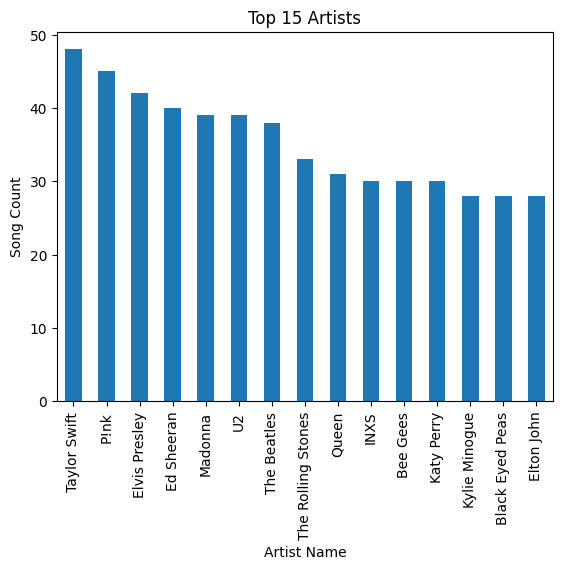

In [35]:
ax = df['Artist Name(s)'].value_counts() \
    .head(15) \
    .plot(kind='bar', title='Top 15 Artists')
ax.set_xlabel('Artist Name')
ax.set_ylabel('Song Count')

Text(0, 0.5, 'Album Count')

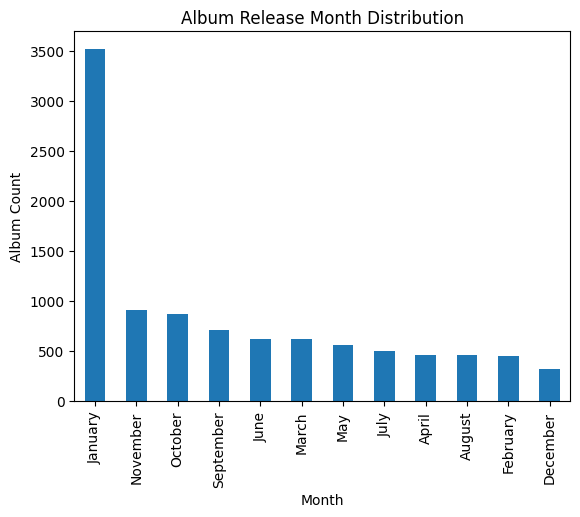

In [39]:
ax = df['Album Release Month'].value_counts() \
    .plot(kind='bar', title='Album Release Month Distribution')
ax.set_xlabel('Month')
ax.set_ylabel('Album Count')

Text(0.5, 0, 'Popularity')

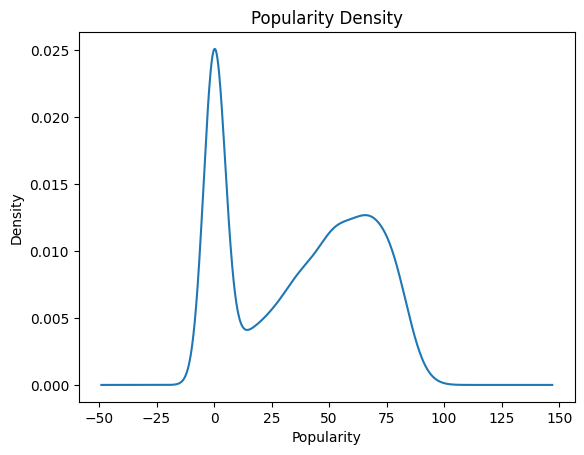

In [41]:
ax = df['Popularity'].plot(kind='kde',
                          title='Popularity Density')
ax.set_xlabel('Popularity')

Text(0.5, 0, 'Year')

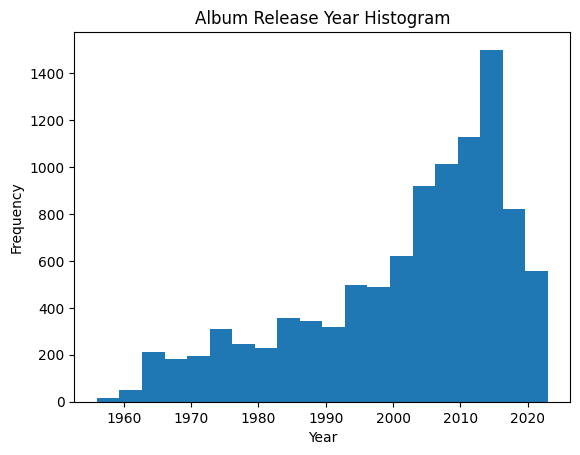

In [45]:
ax = df['Album Release Year'].plot(kind='hist',
                          bins=20,
                          title='Album Release Year Histogram')
ax.set_xlabel('Year')

<AxesSubplot: >

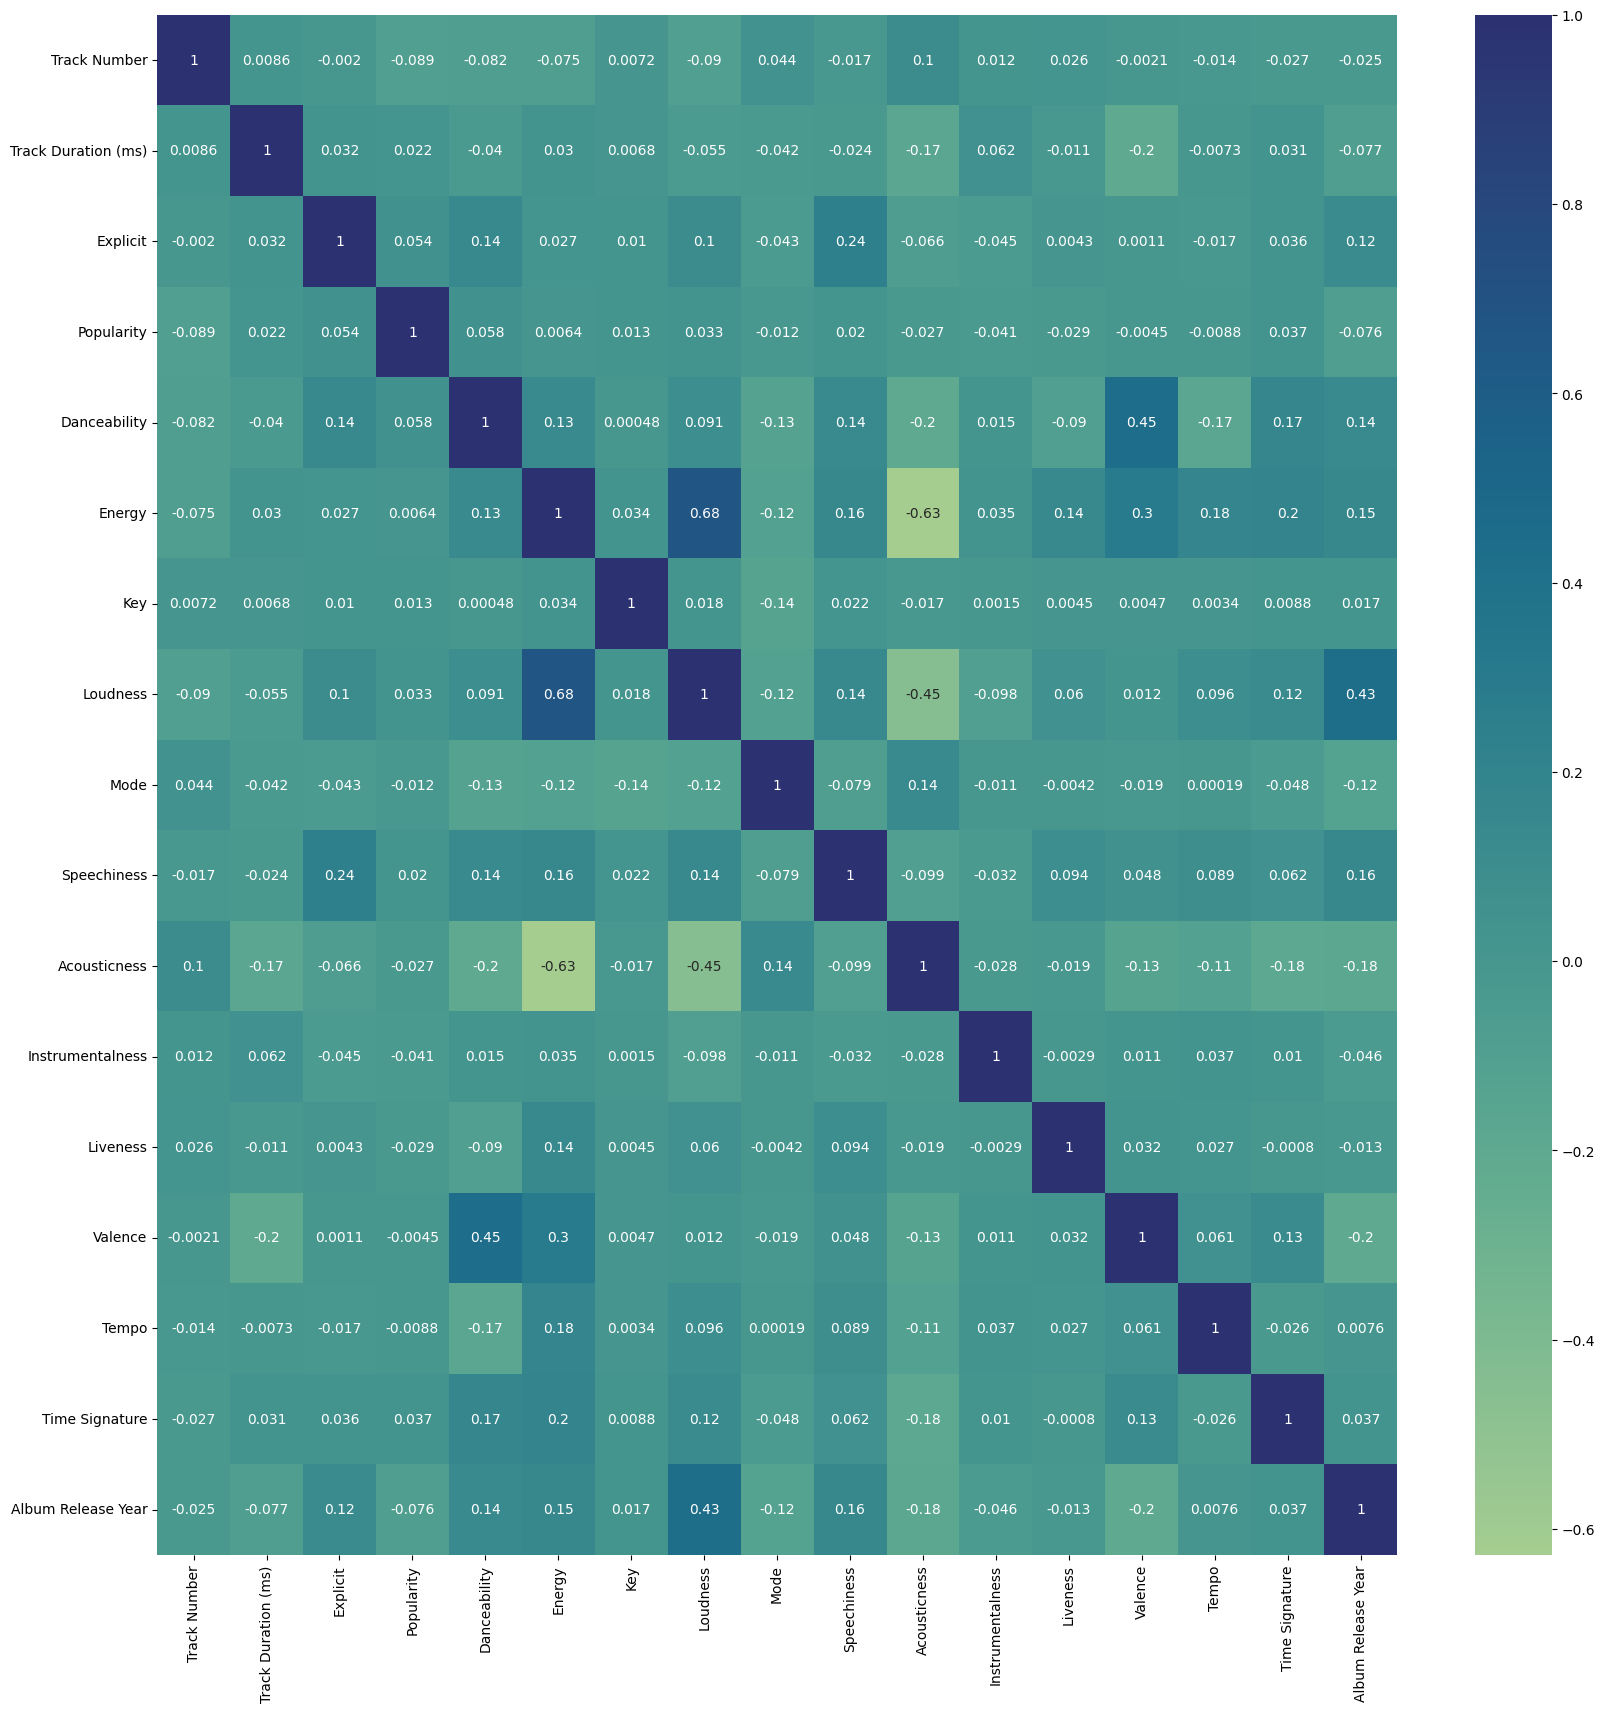

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')

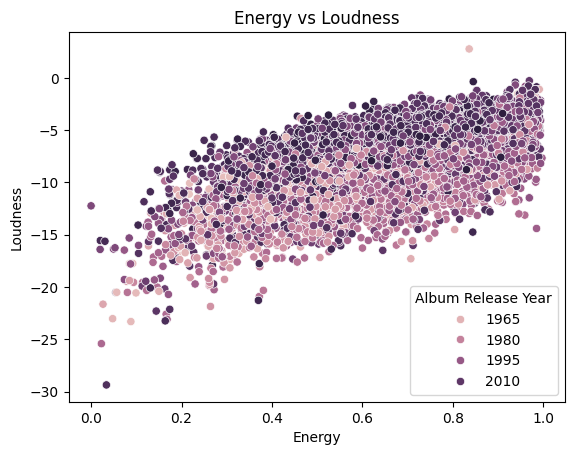

In [60]:
ax = sns.scatterplot(x='Energy',
                y='Loudness',
                hue='Album Release Year',
                data=df)
ax.set_title('Energy vs Loudness')
plt.show()

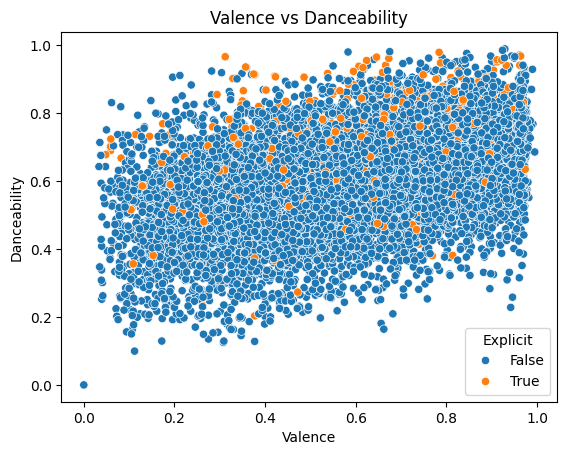

In [50]:
ax = sns.scatterplot(x='Valence',
                y='Danceability',
                hue='Explicit',
                data=df)
ax.set_title('Valence vs Danceability')
plt.show()

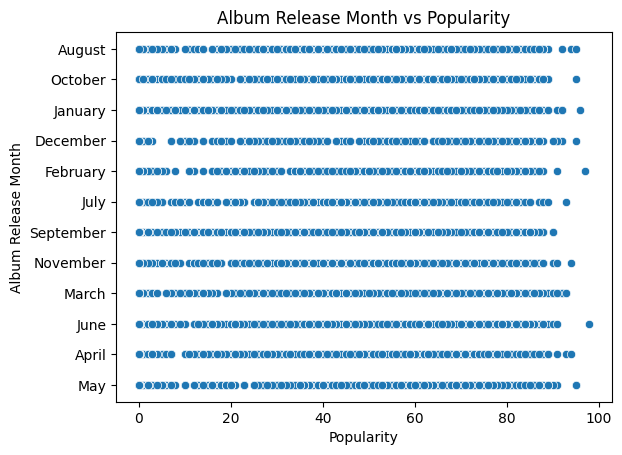

In [59]:
ax = sns.scatterplot(y='Album Release Month',
                x='Popularity',
                data=df)
ax.set_title('Album Release Month vs Popularity')
plt.show()

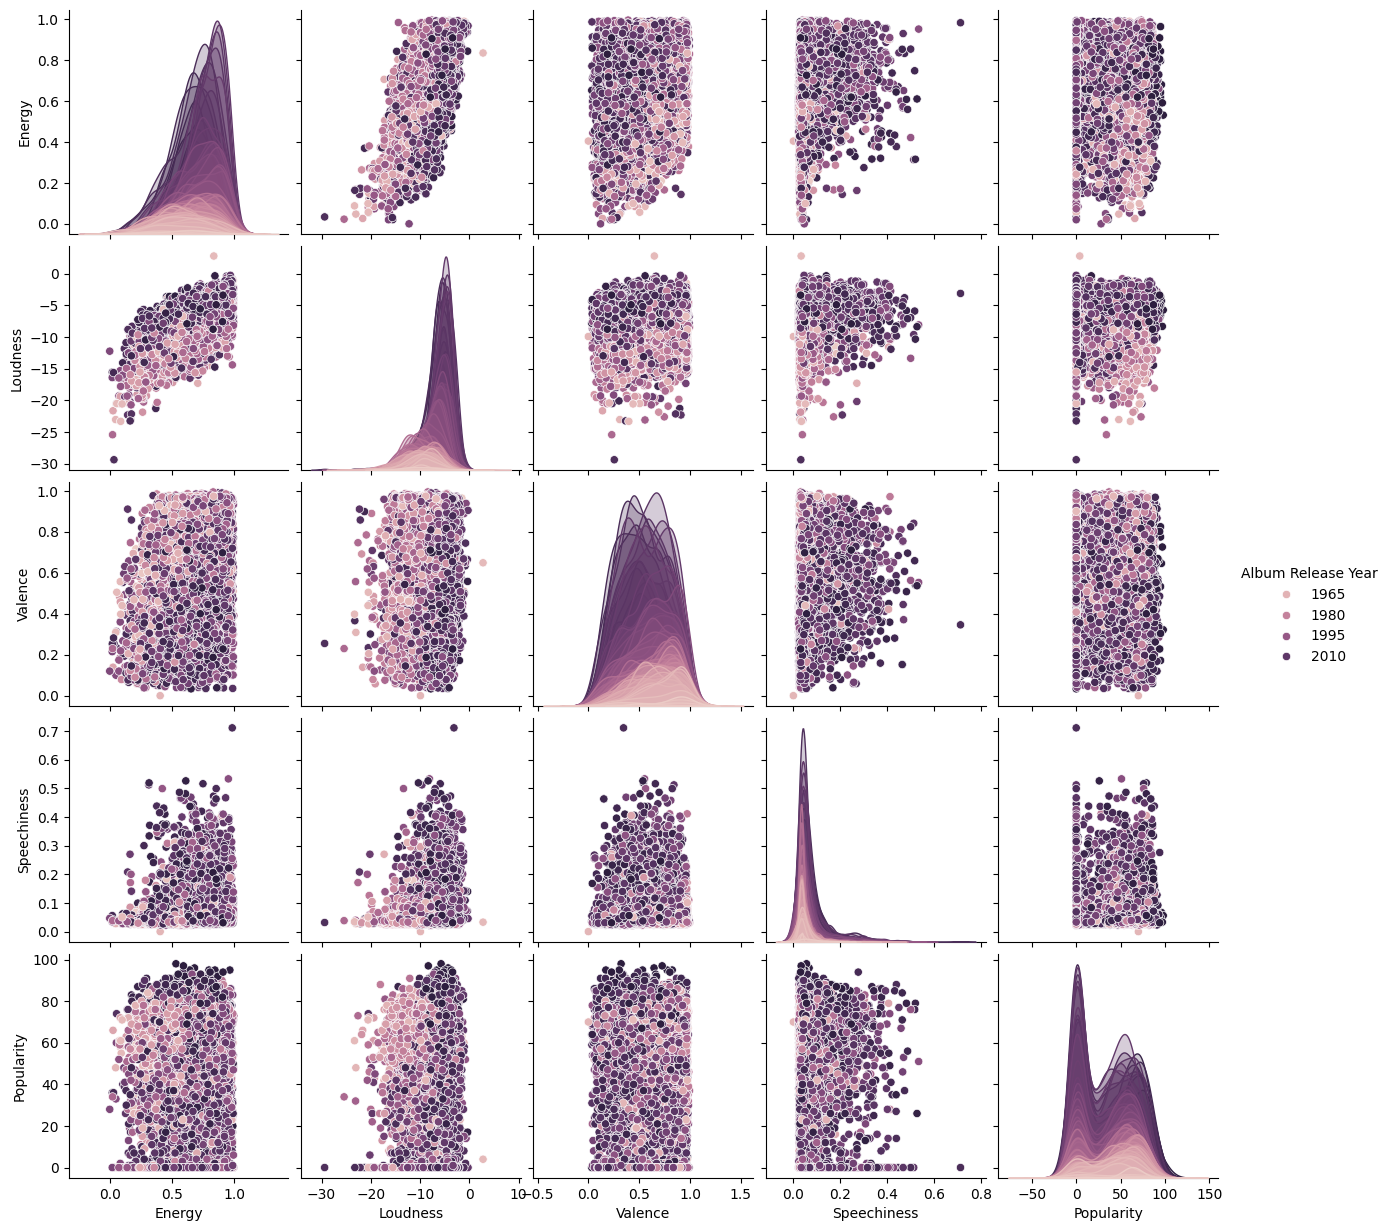

In [54]:
sns.pairplot(df,
             vars=['Energy', 'Loudness', 'Valence', 'Speechiness', 'Popularity'],
            hue='Album Release Year')
plt.show()

<h3><b>4- Statistical Tests

<h4>H0 - 1:

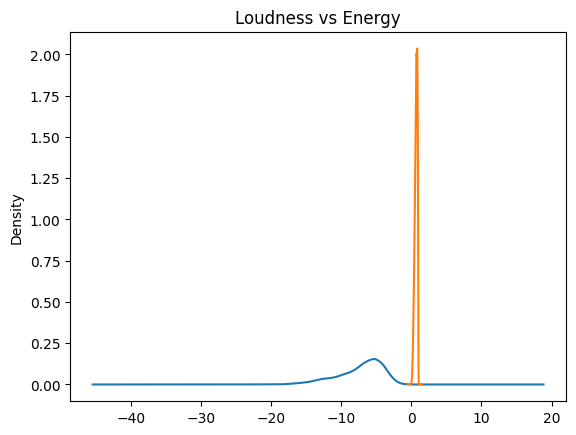

In [69]:
df['Loudness'].plot(kind='kde')
df['Energy'].plot(kind='kde',
                        title='Loudness vs Energy')
plt.show()

In [99]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.pearsonr(sample['Energy'], sample['Loudness'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


0.6785419790706291
p_value: 6.125945907048405e-08
Reject the null hypothesis.


<h4>H0 - 2

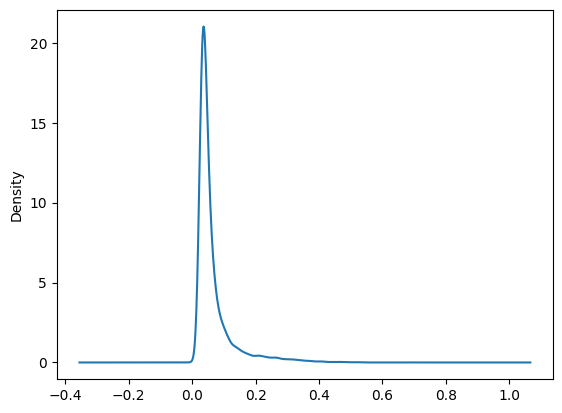

In [98]:
df['Speechiness'].plot(kind='kde')
plt.show()

In [105]:
sample_size = 200
sample = df.sample(n=sample_size, random_state=3)

group1 = sample[sample['Explicit'] == True]['Speechiness']
group2 = sample[sample['Explicit'] == False]['Speechiness']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(t_statistic)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


2.6214596404809276
p_value: 0.009435415753436248
Reject the null hypothesis.


<h4>H0 - 3

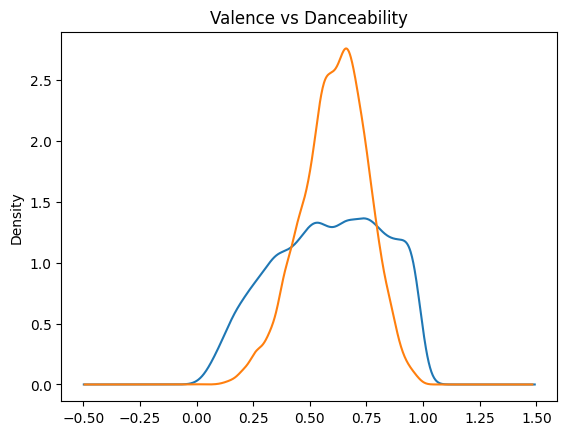

In [106]:
df['Valence'].plot(kind='kde')
df['Danceability'].plot(kind='kde',
                        title='Valence vs Danceability')
plt.show()

In [107]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.pearsonr(sample['Valence'], sample['Danceability'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


0.5580027170380398
p_value: 2.5504938338793607e-05
Reject the null hypothesis.


<h4>H0 - 4

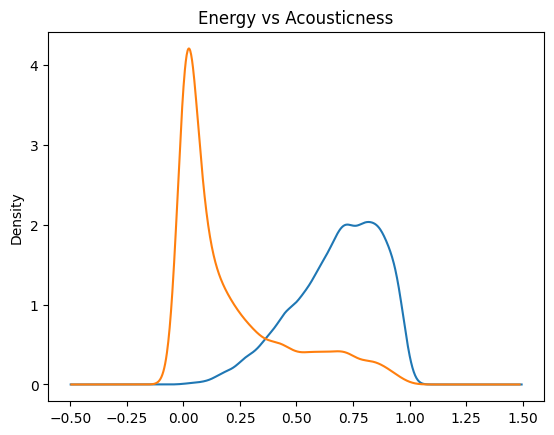

In [108]:
df['Energy'].plot(kind='kde')
df['Acousticness'].plot(kind='kde',
                        title='Energy vs Acousticness')
plt.show()

In [109]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.spearmanr(sample['Energy'], sample['Acousticness'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

-0.5906689718100179
p_value: 6.316184577668157e-06
Reject the null hypothesis.


<h4>H0 - 5

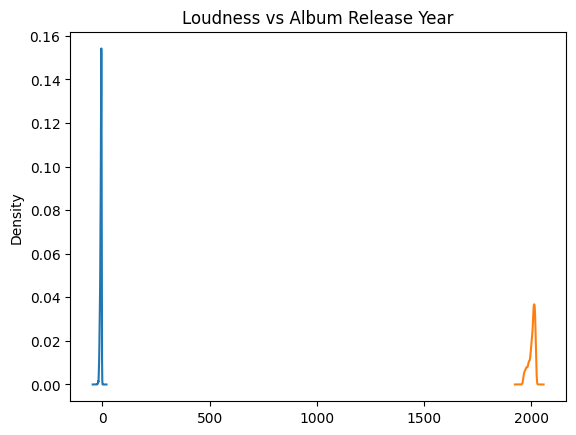

In [110]:
df['Loudness'].plot(kind='kde')
df['Album Release Year'].plot(kind='kde',
                        title='Loudness vs Album Release Year')
plt.show()

In [111]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.spearmanr(sample['Loudness'], sample['Album Release Year'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

0.5072669890341106
p_value: 0.00017012771833628724
Reject the null hypothesis.
